In [2]:
import numpy as np
import pandas as pd
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from collections import OrderedDict

In [23]:
df = pd.read_csv('ISIS Religious Texts v1.csv', encoding = "ISO-8859-1")
df.head()

,Magazine,Issue,Date,Type,Source,Quote,Purpose,Article Name
0,Dabiq,1.0,Jun-14,Jihadist,Abu Mus'ab az-Zarqawi,"The spark has been lit here in Iraq, and its h...",Support,First Page
1,Dabiq,1.0,Jun-14,Hadith,Sahih Muslim,The Hour will not be established until the Ro...,Support,Introduction
2,Dabiq,1.0,Jun-14,Jihadist,Abu Mus'ab az-Zarqawi,"The spark has been lit here in Iraq, and its ...",Support,Introduction
3,Dabiq,1.0,Jun-14,Jihadist,Abu Bakr al-Baghdadi,"O Muslims everywhere, glad tidings to you and...",Support,Khilafah Declared
4,Dabiq,1.0,Jun-14,Jihadist,Abu Bakr al-Baghdadi,"O Ummah of Islam, indeed the world today has ...",Support,The World has Divided into Two Camps


In [24]:
import re
def clearstring(string):
    try:
        string = re.sub('[^A-Za-z0-9 .]+', '', string)
        string = string.split(' ')
        string = filter(None, string)
        string = [y.strip() for y in string]
        string = ' '.join(string)
    except:
        print(string)
    return string

In [25]:
# remove some unnecessary symbols 
for i in range(df.shape[0]):
    df['Quote'].iloc[i] = clearstring(df['Quote'].iloc[i])

/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


nan


In [26]:
# remove last row, empty row
df = df.iloc[:-1, :]
df.head()

,Magazine,Issue,Date,Type,Source,Quote,Purpose,Article Name
0,Dabiq,1.0,Jun-14,Jihadist,Abu Mus'ab az-Zarqawi,The spark has been lit here in Iraq and its he...,Support,First Page
1,Dabiq,1.0,Jun-14,Hadith,Sahih Muslim,The Hour will not be established until the Rom...,Support,Introduction
2,Dabiq,1.0,Jun-14,Jihadist,Abu Mus'ab az-Zarqawi,The spark has been lit here in Iraq and its he...,Support,Introduction
3,Dabiq,1.0,Jun-14,Jihadist,Abu Bakr al-Baghdadi,O Muslims everywhere glad tidings to you and e...,Support,Khilafah Declared
4,Dabiq,1.0,Jun-14,Jihadist,Abu Bakr al-Baghdadi,O Ummah of Islam indeed the world today has be...,Support,The World has Divided into Two Camps


In [27]:
# I just want verbs and nouns in a sentence
def get_clean_text(string):
    blob = TextBlob(string).tags
    tags = []
    # you can add more
    accept = ['NNP', 'NN', 'NNS', 'NNPS', 'VBZ', 'VBN', 'VB']
    for k in blob:
        if k[1] in accept:
            tags.append(k[0])
    return list(OrderedDict.fromkeys(tags))

In [28]:
# we need to split by ('.') to save our memory during speech tagging process to build the tree
for i in range(df.shape[0]):
    texts = df['Quote'].iloc[i].split('. ')
    tags = []
    for t in texts:
        tags += get_clean_text(t)
    df['Quote'].iloc[i] = ' '.join(list(OrderedDict.fromkeys(tags)))

/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [30]:
df['Quote'].iloc[1]

'Hour be established Romans land alAmaq Dabiq places countryside Halab army alMadinah people earth time leave line ranks say Leave taken prisoners fight Muslims Nay Allah abandon brothers third flee forgive killed martyrs conquer afflicted fitnah Constantinople war booty hung swords trees Shaytan shout Messiah has followed families left Shaytans claim is Sham comes battle prayer called Isa Ibn Maryam alayhisSalam descend lead enemy sees melt salt melts water kills hand shows blood spear'

It cleans already

Below I want to get freq of unique for certain columns i want, you can do bar graph

In [31]:
df['Type'].value_counts()

Qur'an                           1011
Hadith                            732
Classical Scholar                 264
Jihadist                          138
Tafsir                            105
Unknown                            98
Media, Politician, or Analyst      77
Bible                              62
Salaf                              39
Sira                               33
Hadith Commentary                  30
Muslim Historical Figure           28
Islamist                           25
Religious Scholar                  11
Fatwa                               8
Shia Scholar                        6
Fiqh                                5
Contemporary Scholar                4
Classical Islamic Scholar           3
Christian                           2
Poetry                              1
Hadith                              1
Western Historical Figure           1
Name: Type, dtype: int64

In [32]:
df['Purpose'].value_counts()

Support    787
Refute      46
Suport       1
Name: Purpose, dtype: int64

In [34]:
df['Magazine'].value_counts()

Dabiq      1481
Rumiyah    1203
Name: Magazine, dtype: int64

In [35]:
df['Source'].value_counts()

Bukhari, Muslim                               154
Sahih Muslim                                  154
Sahih Bukhari                                  80
Ibn Taymiyyah                                  63
Ibn Kathir                                     37
at-Tirmidhi                                    34
Imam Ahmad                                     31
Abu Mus'ab az-Zarqawi                          29
Ibn al-Athir                                   26
at-Tabari                                      26
Ahmad                                          25
Ibn al-Qayyim                                  25
Unknown                                        24
No Source Given                                21
Abu Dawud                                      21
Muslim Brotherhood                             18
Ibn Hajar al-Asqalani, "Fath ul-Bari"          18
As-Salawi                                      16
Abu Hamzah al-Muhajir                          14
Abu Muhammad al-Adnani                         14


How about we predict Magazine from Source?

In [51]:
labels = df['Magazine'].values.copy()

# get unique label
unique_labels = np.unique(labels)
# change into int
labels = LabelEncoder().fit_transform(labels)
texts = df['Quote'].values.copy()

I will use traditional Bag-of-Word and tf-idf for changing text to vectors space

In [54]:
bag_counts = CountVectorizer().fit_transform(texts)
bag_counts.shape

(2684, 8829)

That means, there are 8829 unique of word, every words in a sentence will add value by 1 if got in the vectors.

Example, sentence is 'I LOVE YOU YOU YOU', our vector got [0, 0, 0] represent 'I LOVE YOU',

that mean our vector for 'I LOVE YOU YOU YOU' is [1, 1, 3]

In [57]:
bag_counts_tdidf = TfidfTransformer(use_idf = True).fit_transform(bag_counts)
bag_counts_tdidf.shape

(2684, 8829)


<1x8829 sparse matrix of type '<class 'numpy.float64'>'
	with 14 stored elements in Compressed Sparse Row format>

This is the function of tf-idf
![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/10109d0e60cc9d50a1ea2f189bac0ac29a030a00)

In [58]:
# just want to show example
del bag_counts_tdidf, bag_counts

In [60]:
# i use pipeline to do automate processing to feed into my classifier. bag of word -> tf-idf -> SGD
magazine_clf = Pipeline([('vect', CountVectorizer()), 
                         ('tfidf', TfidfTransformer()), 
                         ('clf', SGDClassifier(loss = 'modified_huber', 
                                               penalty = 'l2', alpha = 1e-4, 
                                               n_iter = 100, random_state = 42))])

How about some visualization for our text data?

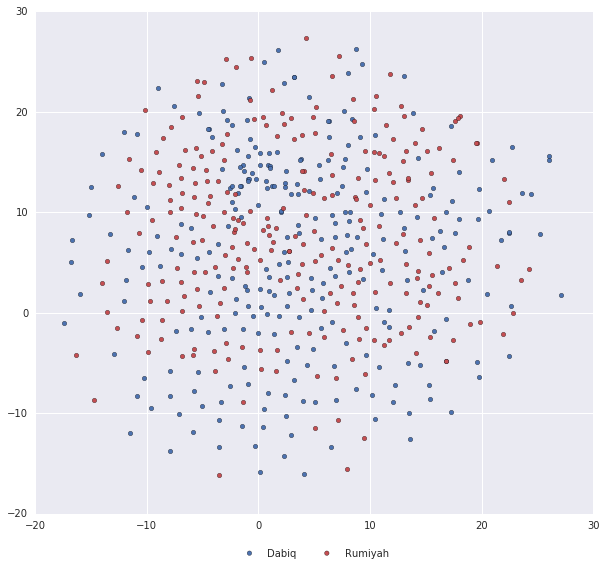

In [74]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.cross_validation import train_test_split
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

current_palette = sns.color_palette()
# blue and red from seaborn
colors = [current_palette[0], current_palette[2]]

# visualize 20% of our data
_, x, _, y = train_test_split(texts, labels, test_size = 0.2)

plt.rcParams["figure.figsize"] = [10, 10]
ax = plt.subplot(111)

X = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),]).fit_transform(x).todense()
tsne = TSNE(n_components = 2).fit_transform(X)
for no, _ in enumerate(np.unique(unique_labels)):
    ax.scatter(tsne[y == no, 0], tsne[y == no, 1], c = colors[no], label = unique_labels[no])
    
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1, box.width, box.height * 0.9])
ax.legend(loc = 'upper center', bbox_to_anchor = (0.5, -0.05), fancybox = True, shadow = True, ncol = 5)
plt.show()

We will got low accuracy for this if reduce the dimension

In [66]:
x_train, x_test, y_train, y_test = train_test_split(texts, labels, test_size = 0.2)
magazine_clf.fit(x_train, y_train)
predicted = magazine_clf.predict(x_test)
print (np.mean(predicted == y_test))

0.813780260708


We got 81 accuracy for validation set! how about f1 score?

In [67]:
print(metrics.classification_report(y_test, predicted, target_names = unique_labels))

             precision    recall  f1-score   support

      Dabiq       0.85      0.82      0.84       308
    Rumiyah       0.77      0.80      0.79       229

avg / total       0.81      0.81      0.81       537



Good enough! how about we do discrimination on 'Type'?

In [68]:
types = df['Type'].values.copy()

# get unique label
unique_types = np.unique(types)
# change into int
types = LabelEncoder().fit_transform(types)

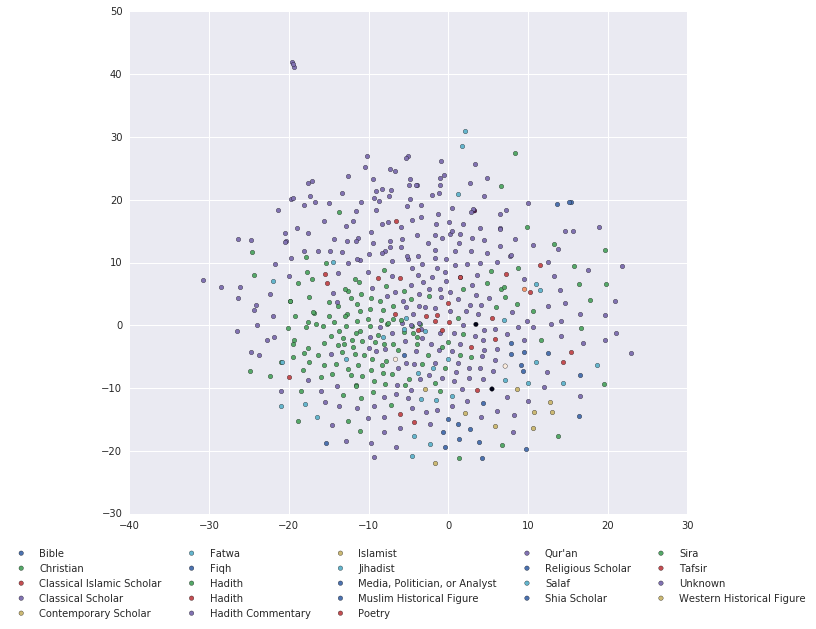

In [75]:
current_palette = sns.color_palette(n_colors = unique_types.shape[0])

# visualize 20% of our data
_, x, _, y = train_test_split(texts, types, test_size = 0.2)

plt.rcParams["figure.figsize"] = [10, 10]
ax = plt.subplot(111)

X = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),]).fit_transform(x).todense()
tsne = TSNE(n_components = 2).fit_transform(X)
for no, _ in enumerate(np.unique(unique_types)):
    ax.scatter(tsne[y == no, 0], tsne[y == no, 1], c = current_palette[no], label = unique_types[no])
    
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1, box.width, box.height * 0.9])
ax.legend(loc = 'upper center', bbox_to_anchor = (0.5, -0.05), fancybox = True, shadow = True, ncol = 5)
plt.show()

It clustered and sticked nearly each others according to population, good!

In [76]:
# i use pipeline to do automate processing to feed into my classifier. bag of word -> tf-idf -> SGD
type_clf = Pipeline([('vect', CountVectorizer()), 
                         ('tfidf', TfidfTransformer()), 
                         ('clf', SGDClassifier(loss = 'modified_huber', 
                                               penalty = 'l2', alpha = 1e-4, 
                                               n_iter = 100, random_state = 42))])

In [78]:
x_train, x_test, y_train, y_test = train_test_split(texts, types, test_size = 0.2)
type_clf.fit(x_train, y_train)
predicted = type_clf.predict(x_test)
print(np.mean(predicted == y_test))
print(metrics.classification_report(y_test, predicted, target_names = unique_types))

0.797020484171
                               precision    recall  f1-score   support

                        Bible       1.00      0.91      0.95        11
                    Christian       0.53      0.50      0.51        56
    Classical Islamic Scholar       0.00      0.00      0.00         2
            Classical Scholar       0.00      0.00      0.00         2
         Contemporary Scholar       0.79      0.82      0.80       148
                        Fatwa       1.00      0.50      0.67         4
                         Fiqh       1.00      1.00      1.00         3
                       Hadith       0.79      0.86      0.83        22
                      Hadith        0.85      0.85      0.85        20
            Hadith Commentary       1.00      0.60      0.75         5
                     Islamist       0.88      0.99      0.93       207
                     Jihadist       0.00      0.00      0.00         1
Media, Politician, or Analyst       0.25      0.17      0.20 

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


['Bible', 'Fatwa', 'Fiqh', 'Hadith Commentary'] seems overfit, anyways, it is good enough to do text classification!